In [49]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


work_dir = '../../data/results/'
img_dir = '../../data/img/'

synthetic_accuracy_binary = pd.read_csv(work_dir+'synthetic_accuracy_binary.csv', index_col='conf_probs')
synthetic_accuracy_prob = pd.read_csv(work_dir+'synthetic_accuracy_prob.csv', index_col='conf_probs')
improvement_synthetic_accuracy_binary = pd.read_csv(work_dir+'improvement_synthetic_accuracy_binary.csv', index_col='conf_probs')
improvement_synthetic_accuracy_prob = pd.read_csv(work_dir+'improvement_synthetic_accuracy_prob.csv', index_col='conf_probs')
synthetic_convergence = pd.read_csv(work_dir+'synthetic_convergence.csv', index_col='number of iterations')
synthetic_values = pd.read_csv(work_dir+'synthetic_values.csv', index_col='number of distinct values per object')
synthetic_accuracy_g = pd.read_csv(work_dir+'accuracy_g_transposed.csv', index_col='Accuracy of sources')

flight_accuracy = pd.read_csv(work_dir+'flight_accuracy.csv', index_col='G')
flight_efficiency = pd.read_csv(work_dir+'flight_efficiency.csv', index_col='Number of objects with confusions')

# face_accuracy = pd.read_csv(work_dir+'face_accuracy.csv')

# Synthetic Data Experiments

# Accuracy with P confusion

Vary the confusion probability in synthetic data (Probability).


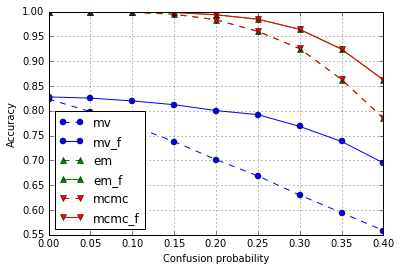

In [2]:
print("Vary the confusion probability in synthetic data (Probability).")
# errs = synthetic_accuracy_prob[['em_std', 'mcmc_std']].rename(columns={
#                                                                      'em std': 'em',
#                                                                      'mcmc std': 'mcmc',
#                                                                      })
ax = synthetic_accuracy_prob[['mv', 'mv_f', 'em', 'em_f', 'mcmc', 'mcmc_f']].plot(
    style=['bo--', 'bo-', 'g^--', 'g^-', 'rv--', 'rv-'], grid='on')

ax.set_ylabel('Accuracy')
ax.set_xlabel('Confusion probability')
fig = ax.get_figure()
fig.savefig(img_dir+'synth_accuracy_probability.pdf')

Vary the confusion probability in synthetic data (Binary).


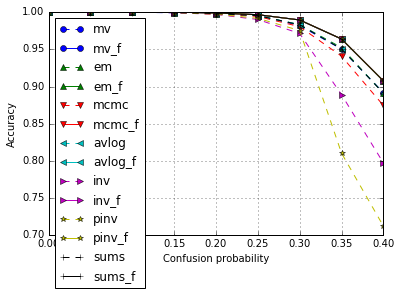

In [6]:
print("Vary the confusion probability in synthetic data (Binary).")

ax = synthetic_accuracy_binary[['mv', 'mv_f', 'em', 'em_f', 'mcmc', 'mcmc_f',
                               'avlog', 'avlog_f', 'inv', 'inv_f',
                               'pinv', 'pinv_f', 'sums', 'sums_f']].plot(
    style=['bo--', 'bo-', 'g^--', 'g^-', 'rv--', 'rv-',
           'c<--', 'c<-', 'm>--', 'm>-', 'y*--', 'y*-',
           'k+--', 'k+-', 'dd--', 'dd-'], grid='on')

ax.set_ylabel('Accuracy')
ax.set_xlabel('Confusion probability')
fig = ax.get_figure()
fig.savefig(img_dir+'synth_accuracy_binary.pdf')

# Accuracy improvement with P confusion

Vary the confusion probability in synthetic data (Probability).


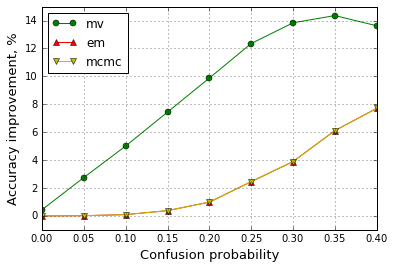

In [11]:
print("Vary the confusion probability in synthetic data (Probability).")
ax = improvement_synthetic_accuracy_prob[['mv', 'em', 'mcmc']].plot(
    style=['go-', 'r^-', 'yv-'], grid='on', ylim=[-1, 15])

ax.set_ylabel('Accuracy improvement, %', fontsize=13)
ax.set_xlabel('Confusion probability', fontsize=13)
fig = ax.get_figure()
fig.savefig(img_dir+'improvement_synth_accuracy_probability.pdf')

Vary the confusion probability in synthetic data (Binary).


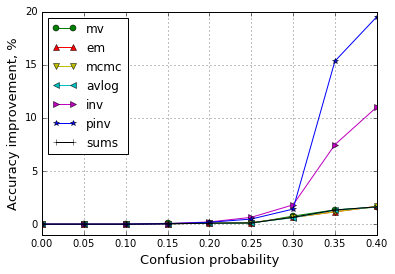

In [15]:
print("Vary the confusion probability in synthetic data (Binary).")
ax = improvement_synthetic_accuracy_binary[['mv', 'em', 'mcmc',
                                           'avlog', 'inv', 'pinv',
                                           'sums']].plot(
    style=['go-', 'r^-', 'yv-',
          'c<-', 'm>-', 'b*-',
          'k+-'], grid='on',
    ylim=[-1, 20])

ax.set_ylabel('Accuracy improvement, %', fontsize=13)
ax.set_xlabel('Confusion probability', fontsize=13)
fig = ax.get_figure()
fig.savefig(img_dir+'improvement_synth_accuracy_binary.pdf')

# G Accuracy vs number of iteration

Convergence of MCMC.


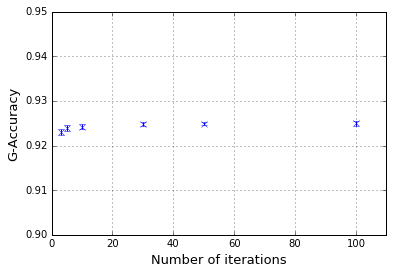

In [26]:
print("Convergence of MCMC.")
ax = synthetic_convergence.plot(marker='x',
                                linestyle='',
                                yerr=synthetic_convergence.error.values,
                                xlim=[0, 110],
                                ylim=[0.9, 0.95],
                                grid='on',
                                legend=False)
ax.set_ylabel('G-Accuracy', fontsize=13)
ax.set_xlabel('Number of iterations', fontsize=13)
fig = ax.get_figure()
fig.savefig(img_dir+'synth_convergence.pdf')

Number of distinct values per object


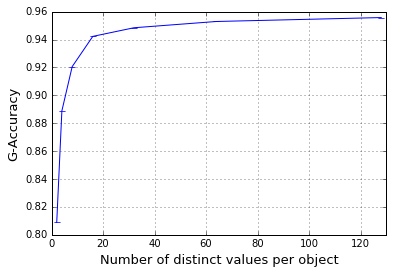

In [27]:
print("Number of distinct values per object")
errs = [x[0] for x in synthetic_values[['error']].values]
ax = synthetic_values[['G accuracy']].plot(grid='on', yerr=errs, xlim=[0, 130], legend=False)
ax.set_ylabel('G-Accuracy', fontsize=13)
ax.set_xlabel('Number of distinct values per object', fontsize=13)
fig = ax.get_figure()
fig.savefig(img_dir+'synth_values.pdf')

# G Accuracy vs Sources Accuracy

G Accuracy vs Sources Accuracy


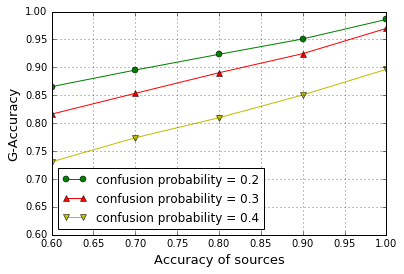

In [28]:
print("G Accuracy vs Sources Accuracy")
ax = synthetic_accuracy_g[['confusion probability = 0.2',
                          'confusion probability = 0.3',
                          'confusion probability = 0.4']].plot(style=['go-', 'r^-', 'yv-'], 
                                                               grid='on',
                                                               ylim=[0.6, 1.])

ax.set_ylabel('G-Accuracy', fontsize=13)
ax.set_xlabel('Accuracy of sources', fontsize=13)
fig = ax.get_figure()
fig.savefig(img_dir+'g_accuracy_vs_s_accuracies.pdf')

# Real Data Experiments

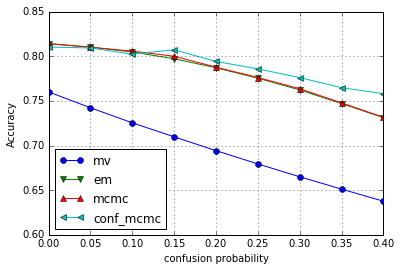

In [9]:
errs = flight_accuracy[['mv_std', 'em_std', 'mcmc_std', 'f_mcmc_std']].rename(columns={"mv_std": "mv",
                                                                                         'em_std': 'em',
                                                                                         'mcmc_std': 'mcmc',
                                                                                         'f_mcmc_std': 'f_mcmc'})
ax = flight_accuracy[['mv', 'em', 'mcmc', 'conf_mcmc']].plot(linestyle='-',
                                                          style=['o', 'v', '^', '<'],
                                                          grid='on')
ax.set_ylabel('Accuracy')

fig = ax.get_figure()
fig.savefig(work_dir+'flight_accuracy.pdf')

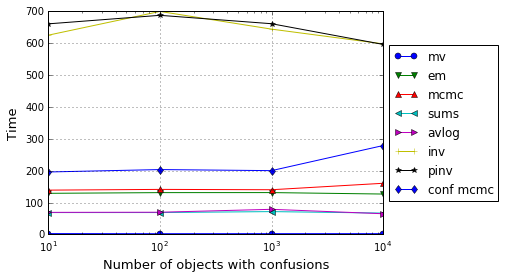

In [57]:
ax = flight_efficiency[['mv', 'em', 'mcmc', 'sums', 'avlog', 'inv', 'pinv', 'conf mcmc']].plot(linestyle='-',
                                                          style=['o', 'v', '^', '<', '>', '+', '*', 'd'],
                                                          grid='on', logx=True)
ax.set_ylabel('Time', fontsize=13)
ax.set_xlabel('Number of objects with confusions', fontsize=13)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #, bbox_to_anchor=(1, 0.5)
fig = ax.get_figure()
fig.savefig(img_dir+'flight_efficiency.pdf', bbox_inches='tight')

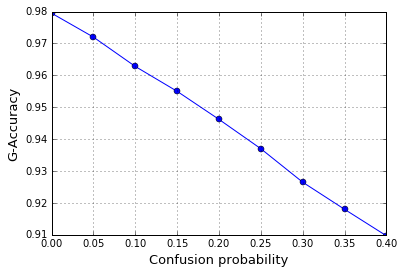

In [58]:
ax = flight_accuracy.plot(linestyle='-', style=['o'], grid='on', ylim=[0.91, 0.98])
ax.set_ylabel('G-Accuracy', fontsize=13)
ax.set_xlabel('Confusion probability', fontsize=13)
ax.legend_.remove()
fig = ax.get_figure()
fig.savefig(img_dir+'flight_G.pdf')

# Faces Experiment

In [2]:
face_accuracy

,accuracy,methods,std
0,0.715926,mv,1.110223e-16
1,0.746667,em,2.931312e-02
2,0.746667,mcmc,2.931312e-02
3,0.762222,f_mcmc,2.287918e-02
